In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import glob 
import cv2 
import tensorflow as tf 
from tensorflow import keras 
import os


In [2]:
# Import training dataset
training_fruit_img = []
training_label = []
for dir_path in glob.glob("D:\Data_Sets\datasets\data\Training\*"):
    img_label = dir_path.split("\*")[-1]
    print(img_label)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_fruit_img.append(img)
        training_label.append(img_label)


D:\Data_Sets\datasets\data\Training\Apple Braeburn
D:\Data_Sets\datasets\data\Training\Apple Crimson Snow
D:\Data_Sets\datasets\data\Training\Apple Golden 1
D:\Data_Sets\datasets\data\Training\Apple Golden 2
D:\Data_Sets\datasets\data\Training\Apple Golden 3
D:\Data_Sets\datasets\data\Training\Apple Granny Smith
D:\Data_Sets\datasets\data\Training\Apple Pink Lady
D:\Data_Sets\datasets\data\Training\Apple Red 1
D:\Data_Sets\datasets\data\Training\Apple Red 2
D:\Data_Sets\datasets\data\Training\Apple Red 3
D:\Data_Sets\datasets\data\Training\Apple Red Delicious
D:\Data_Sets\datasets\data\Training\Apple Red Yellow 1
D:\Data_Sets\datasets\data\Training\Apple Red Yellow 2
D:\Data_Sets\datasets\data\Training\Apricot
D:\Data_Sets\datasets\data\Training\Avocado
D:\Data_Sets\datasets\data\Training\Avocado ripe
D:\Data_Sets\datasets\data\Training\Banana
D:\Data_Sets\datasets\data\Training\Banana Lady Finger
D:\Data_Sets\datasets\data\Training\Banana Red
D:\Data_Sets\datasets\data\Training\Beetro

In [3]:
# Import test dataset
test_fruit_img = []
test_label = []
for dir_path in glob.glob("D:\Data_Sets\datasets\data\Test\*"):
    img_label = dir_path.split("\*")[-1]
    print(img_label)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_fruit_img.append(img)
        test_label.append(img_label)

D:\Data_Sets\datasets\data\Test\Apple Braeburn
D:\Data_Sets\datasets\data\Test\Apple Crimson Snow
D:\Data_Sets\datasets\data\Test\Apple Golden 1
D:\Data_Sets\datasets\data\Test\Apple Golden 2
D:\Data_Sets\datasets\data\Test\Apple Golden 3
D:\Data_Sets\datasets\data\Test\Apple Granny Smith
D:\Data_Sets\datasets\data\Test\Apple Pink Lady
D:\Data_Sets\datasets\data\Test\Apple Red 1
D:\Data_Sets\datasets\data\Test\Apple Red 2
D:\Data_Sets\datasets\data\Test\Apple Red 3
D:\Data_Sets\datasets\data\Test\Apple Red Delicious
D:\Data_Sets\datasets\data\Test\Apple Red Yellow 1
D:\Data_Sets\datasets\data\Test\Apple Red Yellow 2
D:\Data_Sets\datasets\data\Test\Apricot
D:\Data_Sets\datasets\data\Test\Avocado
D:\Data_Sets\datasets\data\Test\Avocado ripe
D:\Data_Sets\datasets\data\Test\Banana
D:\Data_Sets\datasets\data\Test\Banana Lady Finger
D:\Data_Sets\datasets\data\Test\Banana Red
D:\Data_Sets\datasets\data\Test\Beetroot
D:\Data_Sets\datasets\data\Test\Blueberry
D:\Data_Sets\datasets\data\Test\Cac

In [4]:
test_fruits_img = []
tests_label = []
for img_path in glob.glob(os.path.join(r"D:\Data_Sets\datasets\data\test-multiple_fruits", "*.jpg")):
    print(img_path)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_fruits_img.append(img)
    tests_label.append(img_label)


D:\Data_Sets\datasets\data\test-multiple_fruits\apple.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apples1.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apples2.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apples3.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apples4.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apples_peaches1.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apples_peaches2.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apples_pears.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apple_apricot_peach_peach(flat)_pomegranate_pear_plum.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apple_apricot_peach_peach(flat)_pomegranate_pear_plum_2.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apple_apricot_peach_peach(flat)_pomegranate_pear_plum_3.jpg
D:\Data_Sets\datasets\data\test-multiple_fruits\apple_grape.jpg

# Saving trainig data

In [5]:
import pickle

pickle_out = open("training_label","wb")
pickle.dump(training_label, pickle_out)
pickle_out.close()

pickle_out = open("test_label","wb")
pickle.dump(test_label, pickle_out)
pickle_out.close()

pickle_out = open("multiple_fruit_test_label","wb")
pickle.dump(tests_label, pickle_out)
pickle_out.close()

# Converting Fruit Labels to Id

In [4]:
label_to_id_train = {v : k for k, v in enumerate(np.unique(training_label))}
label_to_id_test = {v : k for k, v in enumerate(np.unique(test_label))}
id_to_label_train = {v : k for k, v in label_to_id_train.items()}
id_to_label_test = {v : k for k, v in label_to_id_test.items()}


NameError: name 'training_label' is not defined

In [ ]:
training_label_id = np.array([label_to_id_train[i] for i in training_label])
test_label_id = np.array([label_to_id_test[i] for i in test_label])
print(training_label_id , test_label_id)

# Preparinng Images and Labels

In [6]:
training_fruit_image = []
test_fruit_image = []
for x in training_fruit_img:
    training_fruit_image.append(x/255.0)
for x in test_fruit_img:
    test_fruit_image.append(x/255.0) 



training_data=[]
for i , j in zip(training_fruit_image,training_label_id):
    training_data.append([i, j])
    
test_data=[]
for i , j in zip(test_fruit_image,test_label_id):
    test_data.append([i, j])
# train_images = pd.DataFrame(data = [training_fruit_img ,training_label_id ])


In [7]:
import random 
random.shuffle(training_data)
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, 64, 64, 3)
Y = np.array(Y)

#for test Data
random.shuffle(test_data)
x = []
y = []

for features,label in test_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, 64, 64, 3)
y = np.array(y)


# Saving the Images and Labels after data preprocessing 

In [ ]:
import pickle

pickle_out = open("fruit_image_train.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("fruit_image_label.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

# Saving Test Data

In [ ]:
pickle_out = open("fruit_image_test.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("fruit_label_test.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Model 1

In [8]:
model = keras.Sequential()

# X = pickle.load(open("fruit_image_train.pickle","rb"))
# Y = pickle.load(open("fruit_label_train.pickle","rb"))


model.add(keras.layers.Conv2D(16, (3, 3), input_shape = (64, 64, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), padding = "same", activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dense(120, activation = "softmax"))

In [9]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = keras.optimizers.Adamax(), metrics = ['accuracy'])
# tensorboard = keras.callbacks.TensorBoard(log_dir = "./Graph", histogram_freq = 0, write_graph = True, write_images = True)
model.fit(X, Y, batch_size = 128, epochs = 10)

Train on 60498 samples
Epoch 1/10
60498/60498 [==============================] - 43s 716us/sample - loss: 1.8264 - accuracy: 0.5444
Epoch 2/10
60498/60498 [==============================] - 29s 479us/sample - loss: 0.2735 - accuracy: 0.9192
Epoch 3/10
60498/60498 [==============================] - 29s 484us/sample - loss: 0.1072 - accuracy: 0.9684
Epoch 4/10
60498/60498 [==============================] - 29s 481us/sample - loss: 0.0482 - accuracy: 0.9859
Epoch 5/10
60498/60498 [==============================] - 29s 480us/sample - loss: 0.0333 - accuracy: 0.9905
Epoch 6/10
60498/60498 [==============================] - 29s 480us/sample - loss: 0.0238 - accuracy: 0.9933
Epoch 7/10
60498/60498 [==============================] - 29s 480us/sample - loss: 0.0167 - accuracy: 0.9956
Epoch 8/10
60498/60498 [==============================] - 29s 481us/sample - loss: 0.0150 - accuracy: 0.9959
Epoch 9/10
60498/60498 [==============================] - 29s 479us/sample - loss: 0.0110 - accuracy: 0.9

In [11]:
loss, accuracy = model.evaluate(x, y)
print("\n\nLoss:", loss)
print("Accuracy:", accuracy)
model.save("fruit_classification_model_1")

20622/20622 [==============================] - 8s 374us/sample - loss: 0.2579 - accuracy: 0.9440


Loss: 0.25790219371913475
Accuracy: 0.94404036
INFO:tensorflow:Assets written to: fruit_classification_model_1\assets


In [ ]:
predictions = model.predict(x)
# predictions
plt.figure(figsize = (30, 30))
for i in range(30):
    plt.subplot(9,5, i + 1)
    plt.xlabel("{}".format(id_to_label_test[np.argmax(predictions[i])]))
    plt.imshow(x[i])

# Model 2

In [16]:
classifier = keras.Sequential()


# X = pickle.load(open("fruit_image_train.pickle","rb"))
# y = pickle.load(open("fruit_label_train.pickle","rb"))

# Step 1 - Convolution
classifier.add(keras.layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides= 2))


# Adding a second convolutional layer
classifier.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides= 2))

# Adding a third convolutional layer
classifier.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides= 2))

# Adding a third convolutional layer
classifier.add(keras.layers.Conv2D(256, (3, 3), activation = 'relu'))
classifier.add(keras.layers.Dropout(0.25))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides= 2))

# Step 3 - Flattening
classifier.add(keras.layers.Flatten())

# Step 4 - Full connection
classifier.add(keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(keras.layers.Dropout(0.25))
classifier.add(keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(keras.layers.Dropout(0.25))
classifier.add(keras.layers.Dense(units = 120, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [17]:
classifier.fit(X, Y, batch_size = 128, epochs = 10)

Train on 60498 samples
Epoch 1/10
60498/60498 [==============================] - 54s 891us/sample - loss: 1.6762 - accuracy: 0.5497
Epoch 2/10
60498/60498 [==============================] - 48s 801us/sample - loss: 0.3255 - accuracy: 0.8907
Epoch 3/10
60498/60498 [==============================] - 38s 628us/sample - loss: 0.1806 - accuracy: 0.9399
Epoch 4/10
60498/60498 [==============================] - 18s 292us/sample - loss: 0.1312 - accuracy: 0.9564
Epoch 5/10
60498/60498 [==============================] - 18s 293us/sample - loss: 0.1023 - accuracy: 0.9671
Epoch 6/10
60498/60498 [==============================] - 18s 294us/sample - loss: 0.0859 - accuracy: 0.9715
Epoch 7/10
60498/60498 [==============================] - 18s 299us/sample - loss: 0.0739 - accuracy: 0.9757
Epoch 8/10
60498/60498 [==============================] - 18s 304us/sample - loss: 0.0652 - accuracy: 0.9789
Epoch 9/10
60498/60498 [==============================] - 18s 305us/sample - loss: 0.0606 - accuracy: 0.9

In [18]:
loss, accuracy = classifier.evaluate(x, y)
print("\n\nLoss:", loss)
print("Accuracy:", accuracy)
model.save("fruit_classification_model_2")

20622/20622 [==============================] - 4s 216us/sample - loss: 0.0879 - accuracy: 0.9781


Loss: 0.08786725384528624
Accuracy: 0.97808164
INFO:tensorflow:Assets written to: fruit_classification_model_2\assets


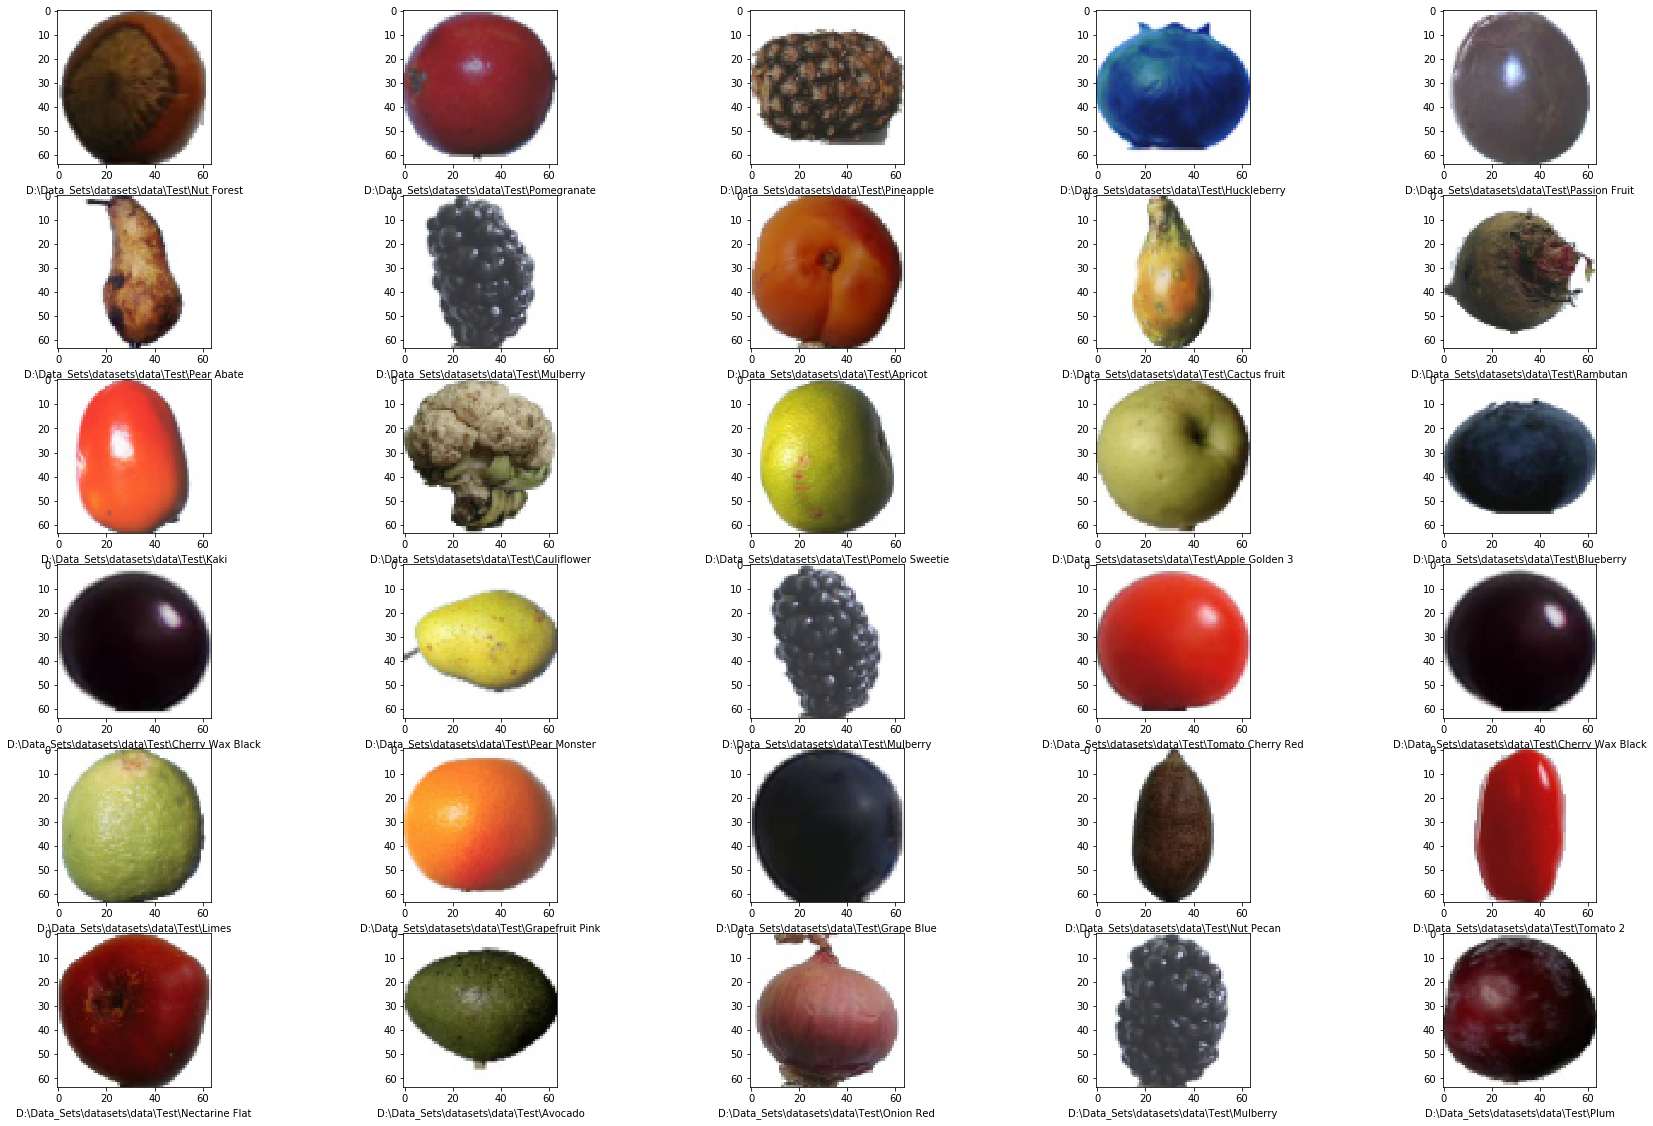

In [21]:
predictions = classifier.predict(x)
# predictions
plt.figure(figsize = (30, 30))
for i in range(30):
    plt.subplot(9,5, i + 1)
    plt.xlabel("{}".format(id_to_label_test[np.argmax(predictions[i])]))
    plt.imshow(x[i])

# Testing on Real Images

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


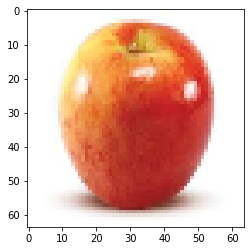

In [14]:
img = cv2.imread(r'C:\Users\Gaming\Downloads\test.jpg')

img = cv2.resize(img, (64, 64))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
image = img.reshape(-1, 64, 64, 3)

p = classifier.predict(image)
# id_to_label_test[np.argmax(p)]
for i in p:
    if i.any()==1:
        print(i)


In [2]:
classifier = tf.keras.models.load_model(r'C:\Users\Gaming\fruit_classification_model_2')